In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
num_emp_df=pd.read_csv("Visadataset.csv")
num_emp_df.head(2)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified


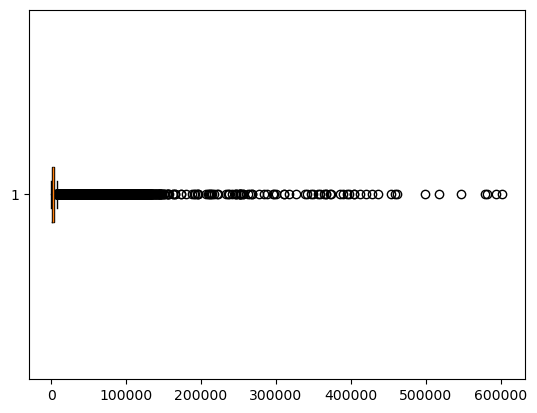

In [15]:
plt.boxplot(num_emp_df['no_of_employees'],vert=False)
plt.show()

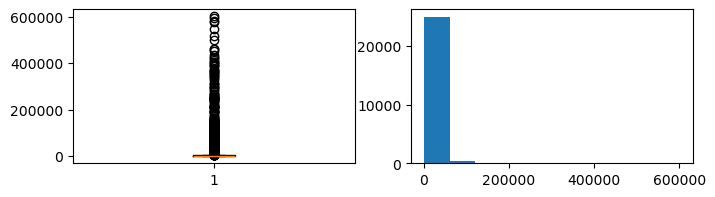

In [5]:
plt.figure(figsize=(8,2))
plt.subplot(1,2,1).boxplot(num_emp_df['no_of_employees'])
plt.subplot(1,2,2).hist(num_emp_df['no_of_employees']) 
plt.show()

<Axes: >

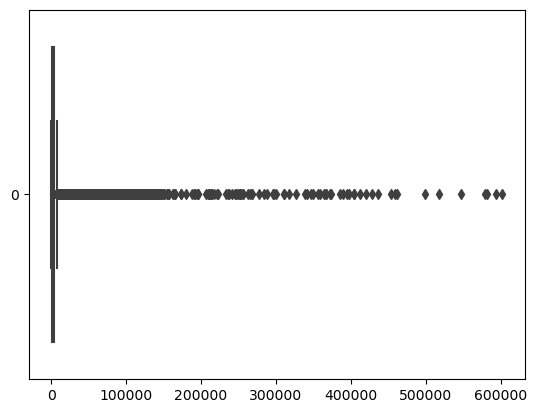

In [10]:
sns.boxplot(num_emp_df['no_of_employees'],orient='h')

In [11]:
num_emp_df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


**outeliers-data**

In [16]:
q1 = round(np.percentile(num_emp_df['no_of_employees'], 25), 2)

q2 = round(np.percentile(num_emp_df['no_of_employees'], 50), 2)

q3 = round(np.percentile(num_emp_df['no_of_employees'],75),2)


IQR = q3-q1

LB  = q1 - 1.5 * IQR

UB =  q3 + 1.5 * IQR

con = num_emp_df['no_of_employees']<LB

con1 = num_emp_df['no_of_employees']> UB 

outlier_df = num_emp_df[con | con1]


len(outlier_df)


1556

**non-outliers-data**

In [18]:
Q1 = round(np.percentile(num_emp_df['no_of_employees'], 25), 2)

Q2 = round(np.percentile(num_emp_df['no_of_employees'], 50), 2)

Q3 = round(np.percentile(num_emp_df['no_of_employees'], 75), 2)

IQR = q3-q1

LB  = q1 - 1.5 * IQR

UB =  q3 + 1.5 * IQR


con = num_emp_df['no_of_employees']>LB

con1 = num_emp_df['no_of_employees']< UB 

non_outlier_df = num_emp_df[con & con1]

len(non_outlier_df)




23924

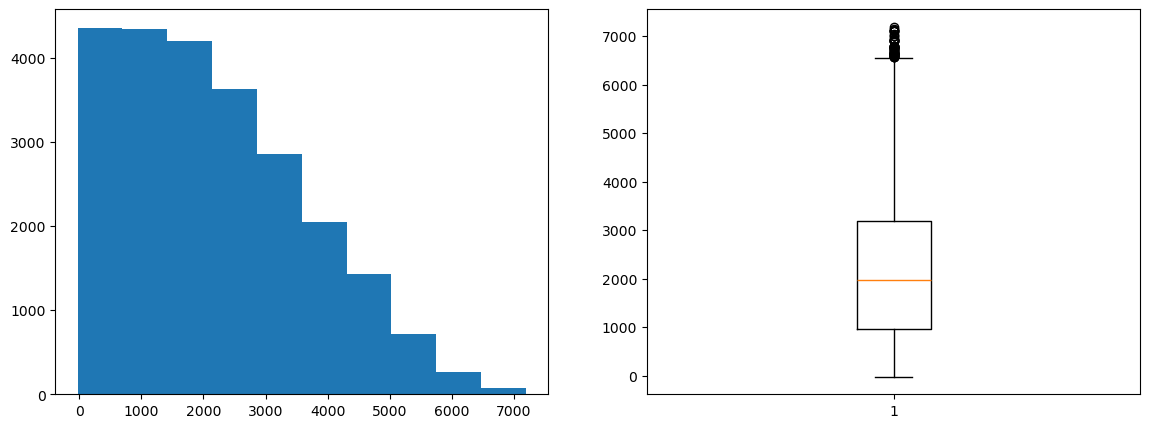

In [19]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1).hist(non_outlier_df['no_of_employees'])
plt.subplot(1,2,2).boxplot(non_outlier_df['no_of_employees'])
plt.show()

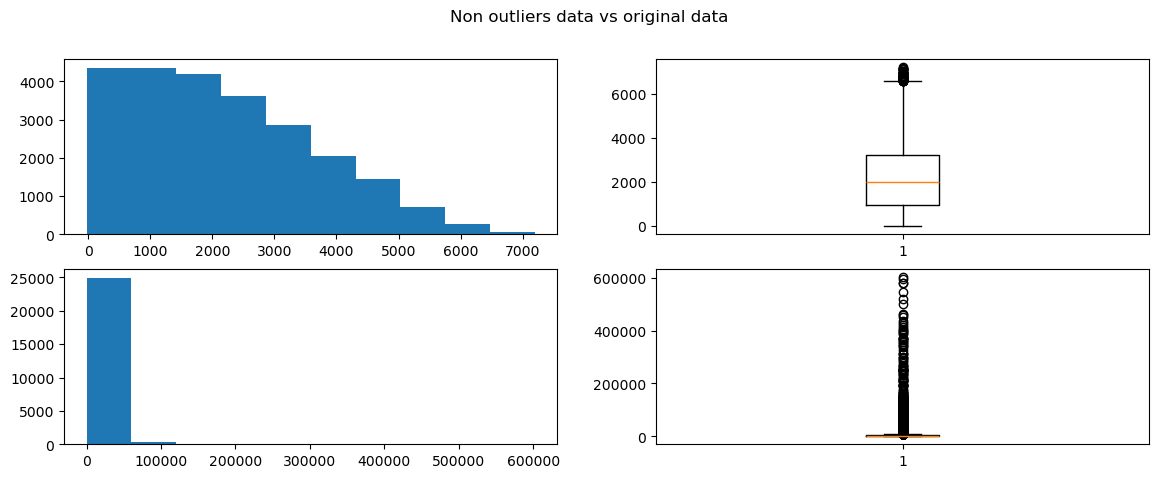

In [20]:
plt.figure(figsize=(14,5))
plt.suptitle('Non outliers data vs original data')
plt.subplot(2,2,1).hist(non_outlier_df['no_of_employees'])
plt.subplot(2,2,2).boxplot(non_outlier_df['no_of_employees'])
plt.subplot(2,2,3).hist(num_emp_df['no_of_employees'])
plt.subplot(2,2,4).boxplot(num_emp_df['no_of_employees'])
plt.show()


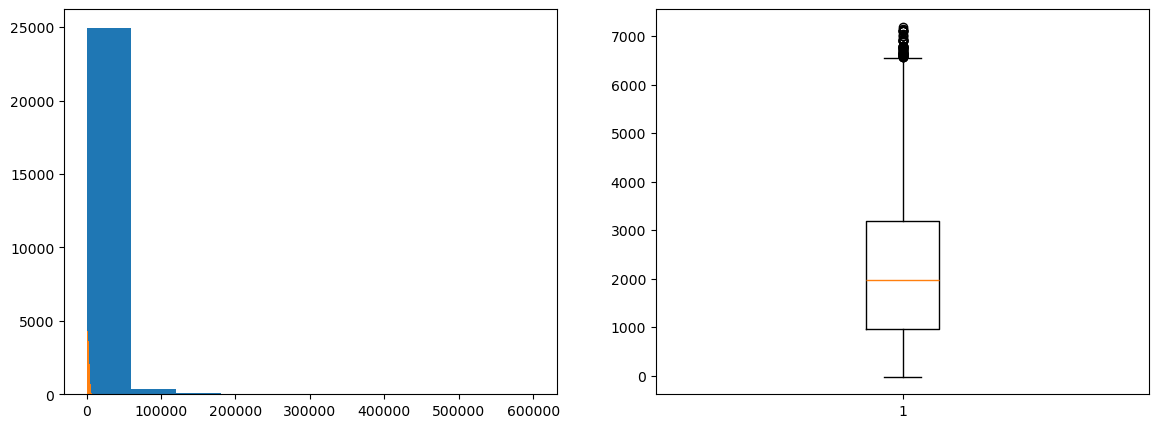

In [24]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1).hist(num_emp_df['no_of_employees'])
plt.subplot(1,2,1).hist(non_outlier_df['no_of_employees'])
plt.subplot(1,2,2).boxplot(non_outlier_df['no_of_employees'])
plt.show()


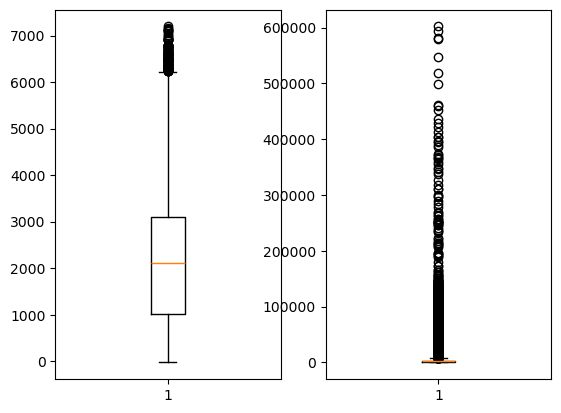

In [29]:
list = []

median_val = num_emp_df['no_of_employees'].median()

Q1 = round(np.percentile(num_emp_df['no_of_employees'], 25), 2)

Q3 = round(np.percentile(num_emp_df['no_of_employees'], 75), 2)

IQR = q3-q1

LB  = q1 - 1.5 * IQR

UB =  q3 + 1.5 * IQR

for i in num_emp_df['no_of_employees'].values:
    if i < LB or i > UB:
        list.append(median_val)
    else:
        list.append(i)
        
sagar_df = num_emp_df.copy()

sagar_df['no_of_employee'] = list


plt.subplot(1,2,1).boxplot(sagar_df['no_of_employee'])
plt.subplot(1,2,2).boxplot(num_emp_df['no_of_employees'])
plt.show()
        


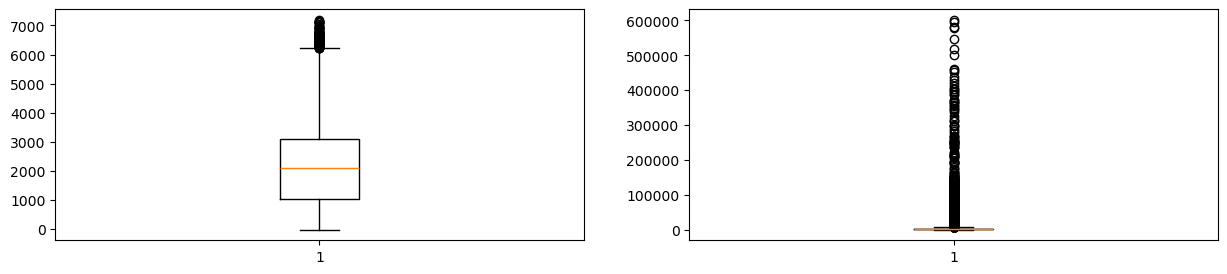

In [30]:
plt.figure(figsize=(15,3))
con19= num_emp_df['no_of_employees']<LB 
con10 = num_emp_df['no_of_employees']>UB
con2 = con19|con10

m = num_emp_df['no_of_employees'].median()
new_data=np.where(con2,
                 m,
                 num_emp_df['no_of_employees'])
sagar_df = num_emp_df.copy()

sagar_df['no_of_employee'] = list

plt.subplot(1,2,1).boxplot(sagar_df['no_of_employee'])
plt.subplot(1,2,2).boxplot(num_emp_df['no_of_employees'])
plt.show()
        
 
